In [1]:
import pandas as pd
data=pd.read_csv('banladesh.csv',index_col='ObservationDate',parse_dates=True)
data.head()

,Confirmed
ObservationDate,
2020-03-08,3
2020-03-09,3
2020-03-10,3
2020-03-11,3
2020-03-12,3


In [ ]:
data.head(10)

In [2]:
import math
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense


In [3]:
def train_test_split(data,n_test):
    return data[:-n_test],data[-n_test:]

def series_to_supervised(data,n_in,n_out=1):
    df=pd.DataFrame(data)
    cols=list()

    for i in range(n_in,0,-1):
        cols.append(df.shift(i))
    
    for i in range(0,n_out):
        cols.append(df.shift(-i))
    
    agg=pd.concat(cols,axis=1)
    agg.dropna(inplace=True)
    #print(agg.head(5))

    return agg.values

In [4]:
def model_fit(train,config):
    return None

def model_predict(model,history,config):
    values=list()
    for offset in config:
        values.append(history[-offset])
    return np.median(values)

def measure_rmse(actual,prediction):
    return math.sqrt(metrics.mean_squared_error(actual,prediction,squared=False))

def walk_forward_validation(data,n_test,cfg):
    predictions=list()
    train,test=train_test_split(data,n_test)

    model=model_fit(train,cfg)

    history=[x for x in train]
    # print(len(history))
    # print(type(test))
    # print(len(test))
    for i in range(len(test)):
        yhat=model_predict(model,history,cfg)
        predictions.append(yhat)
        history.append(test[i])
    error=measure_rmse(test,predictions)
    print("  %.3f " %error)
    return error
def repeat_evaluate(data,config,n_test,n_repeats=5):
    scores=[walk_forward_validation(data,n_test,config) for _ in range(int(n_repeats))]
    return scores
def summarize_scores(name,scores):
    scores_m, score_std= np.mean(scores), np.std(scores)
    print("%s: %.3f RMSE (+/- %3f" %(name,scores_m,score_std))
    plt.boxplot(scores)
    plt.show()


In [6]:
data=data.values

  316.696 
  316.696 
  316.696 
  316.696 
  316.696 
Persistence: 316.696 RMSE (+/- 0.000000


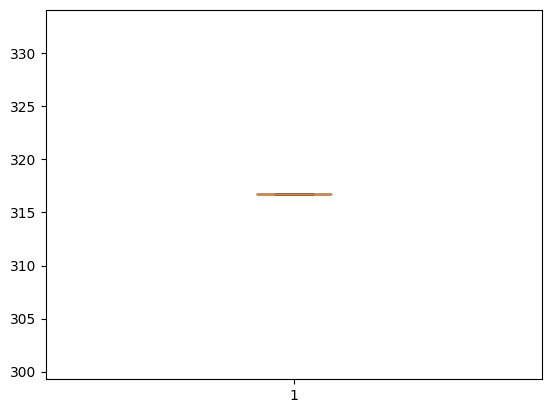

In [10]:
#data=data.values
n_test=164
config=[12,24,36]
scores=repeat_evaluate(data,config,n_test)

summarize_scores('Persistence',scores)

In [11]:
def train_test_split(data,n_test):
    return data[:-n_test],data[-n_test:]

def series_to_supervised(data,n_in,n_out=1):
    df=pd.DataFrame(data)
    cols=list()

    for i in range(n_in,0,-1):
        cols.append(df.shift(i))
    
    for i in range(0,n_out):
        cols.append(df.shift(-i))
    
    agg=pd.concat(cols,axis=1)
    agg.dropna(inplace=True)
    #print(agg.head(5))

    return agg.values
def model_fit(train,config):

    n_input, n_nodes, n_epochs, n_batch= config

    data=series_to_supervised(train,n_input)
    # print('model fitting')
    train_x, train_y=data[:,:-1],data[:,-1]
    #print('Model fitting 2')
    model=Sequential()
    model.add(Dense(n_nodes,activation='relu',input_dim=n_input))
    #model.add(Dense(30,activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mse',optimizer='adam')

    model.fit(train_x,train_y,epochs=n_epochs, batch_size=n_batch,verbose=0)
    return model

def model_predict(model,history,config):
    n_input,_,_,_=config
    #values=list()
    x_input=np.array(history[-n_input:]).reshape(1,n_input)
    #print(x_input)
    y_hat=model.predict(x_input,verbose=0)
    return y_hat[0]

def measure_rmse(actual,prediction):
    return math.sqrt(metrics.mean_squared_error(actual,prediction,squared=False))

def walk_forward_validation(data,n_test,cfg):
    predictions=list()
    train,test=train_test_split(data,n_test)

    model=model_fit(train,cfg)

    history=[x for x in train]
    # print(len(history))
    # print(type(test))
    # print(len(test))
    for i in range(len(test)):
        yhat=model_predict(model,history,cfg)
        predictions.append(yhat)
        history.append(test[i])
    error=measure_rmse(test,predictions)
    print("  %.3f " %error)
    return error
def repeat_evaluate(data,config,n_test,n_repeats=5):
    scores=[walk_forward_validation(data,n_test,config) for _ in range(int(n_repeats))]
    return scores
def summarize_scores(name,scores):
    scores_m, score_std= np.mean(scores), np.std(scores)
    print("%s: %.3f RMSE (+/- %3f" %(name,scores_m,score_std))
    plt.boxplot(scores)
    plt.show()


In [ ]:
data=data.values

* for 36 days === 137.557
* for 24 days === 120.848 
* for 12 days === 77.75

  91.191 
  65.160 
  81.765 
  74.093 
  90.408 
Persistence: 80.523 RMSE (+/- 9.903870


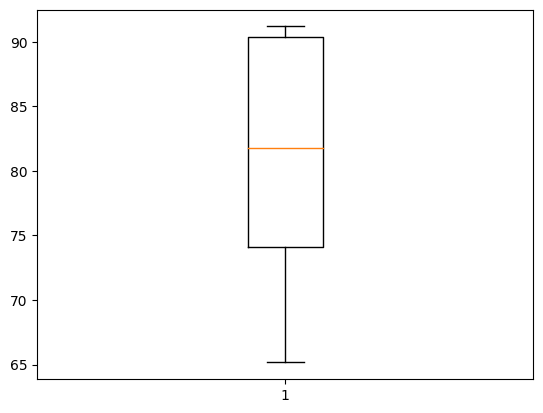

In [14]:
#data=data.values
n_test=164
config=[12,500,100,100]
scores=repeat_evaluate(data,config,n_test)

summarize_scores('Persistence',scores)